# One More Visualization Example and Then Back to the Workflow

## Comparing Two Series
With this workflow and modules we've designed, we aren't limited to just visualizing one series.  We can use our modules to acquire two data series and compare them.

In [1]:
from pythonv2.modules import *

usgs_data = acquire_streamflow_nwis_iv(site='04294000', start='2016-06-01', end='2016-11-01')
nwm_data = acquire_streamflow_nwm_retrospective(site=166176984, start='2016-06-01', end='2016-11-01')

Now, let's make a simple module to compare them

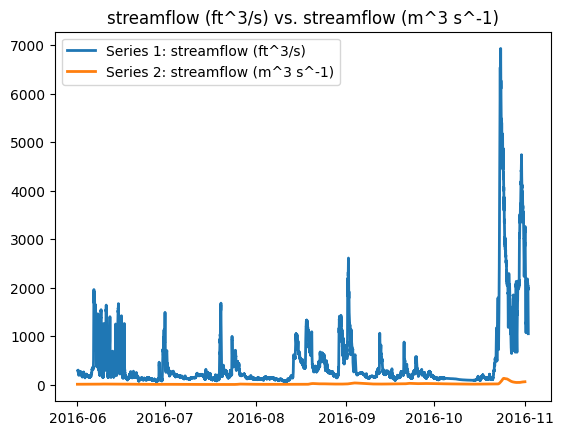

In [12]:
import matplotlib.pyplot as plt

def visualize_matplotlib_comparison(series1, series2, save_figure = False):
    fig, ax = plt.subplots()
    ax.plot(series1, linewidth=2.0, label=f'Series 1: {series1.name}')
    ax.plot(series2, linewidth=2.0, label=f'Series 2: {series2.name}')
    plt.legend()
    ax.set_title(f'{series1.name} vs. {series2.name}')
    if save_figure:
        plt.savefig('comparison.png')
    else:
        plt.show()

visualize_matplotlib_comparison(usgs_data, nwm_data)

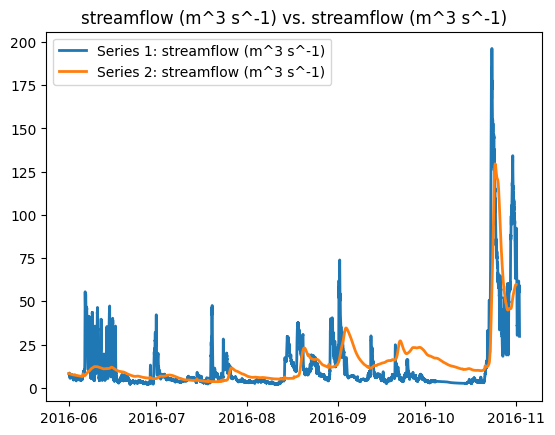

In [13]:
def cubicftsec_to_cubicmsec(series):
    new_name = series.name.split('(')[0] + '(m^3 s^-1)'
    return (series * 0.0283168).rename(new_name)

adjusted_usgs = cubicftsec_to_cubicmsec(usgs_data)
visualize_matplotlib_comparison(adjusted_usgs, nwm_data)

## Back to the Workflow
Now, we can use these functions to actually do some interesting stuff in our workflow.

This new version of the workflow and modules are in the ```pythonv2``` directory.

[modules.py](pythonv2/modules.py)  
[workflowCLI.py](pythonv2/workflowCLI.py)  

To run this new workflow, change directory to pythonv2, and then use something like ```python workflowCLI.py 2016-06-01 2016-11-01``` as before.  And... if we want to compare a different timeframe, we can simply run that workflow with different dates as command line arguments!
